In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


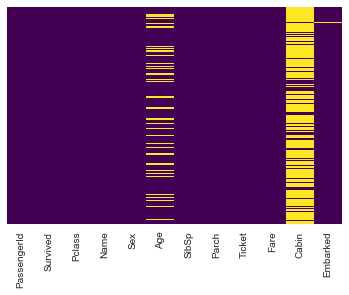

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

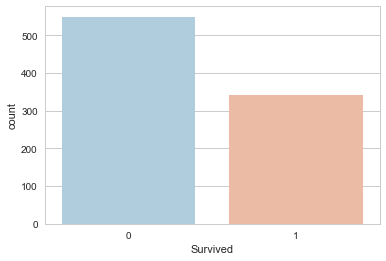

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

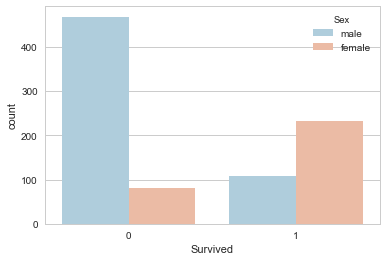

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

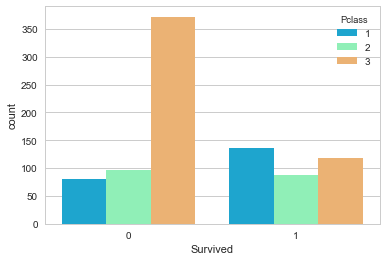

In [6]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

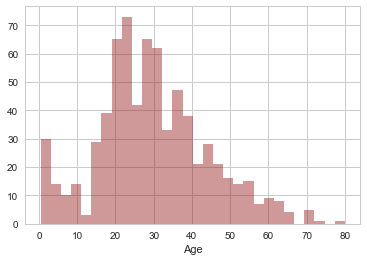

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

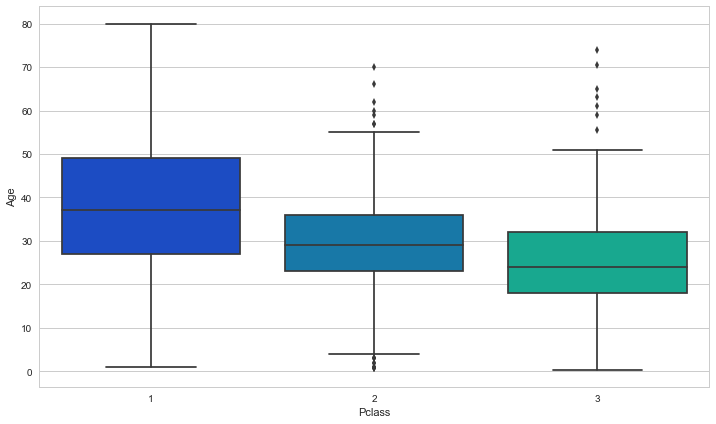

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

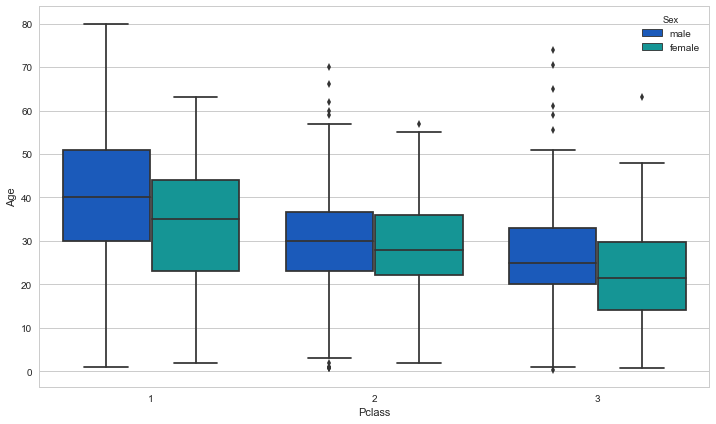

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,hue="Sex",palette='winter')

In [10]:
# just stick with mean(Pclass) now
means = train.groupby("Pclass")["Age"].mean()

In [11]:
def fillAge(row):
    age = row.Age
    Pclass = row.Pclass
    
    if pd.isnull(age):
        return means[Pclass]
    else:
        return age
    
train["Age"] = train.apply(fillAge,axis=1)

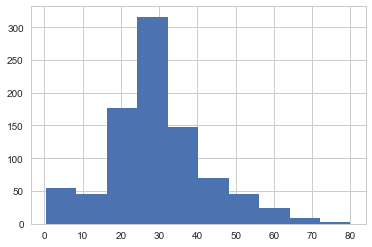

In [12]:
train["Age"].hist()

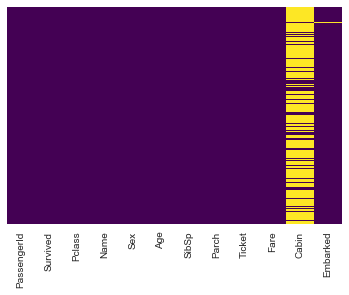

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
train.drop("Cabin",axis=1,inplace=True)

In [15]:
# train.dropna(axis=0,inplace=True)
train["Embarked"].fillna("S",inplace=True)

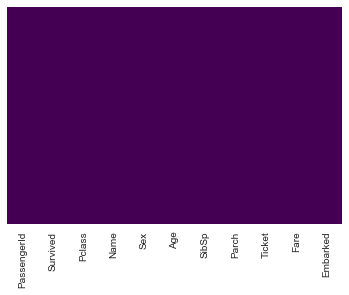

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
male = pd.get_dummies(train.Sex,drop_first=True)

In [19]:
e = pd.get_dummies(train.Embarked,drop_first=True)
c = pd.get_dummies(train.Pclass,drop_first=True)

In [20]:
train = pd.concat([train,male,e,c],axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [22]:
train.drop("Sex",axis=1,inplace=True)
train.drop("Pclass",axis=1,inplace=True)
train.drop("Embarked",axis=1,inplace=True)
train.drop("Name",axis=1,inplace=True)
train.drop("Ticket",axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [24]:
# OK, let's do all these steps with the test
test = pd.read_csv("test.csv")
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.drop("Cabin",axis=1,inplace=True)
test["Age"] = test.apply(fillAge,axis=1)
test["Embarked"].fillna("S",inplace=True)
test["Fare"].fillna(test[test.Fare.notnull()]["Fare"].mean(),inplace=True)
# test.dropna(axis=0,inplace=True)
# test.Fare.isnull().value_counts()

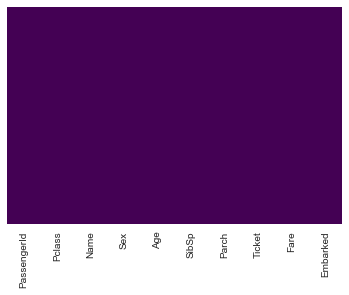

In [25]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
male = pd.get_dummies(test.Sex,drop_first=True)
e = pd.get_dummies(test.Embarked,drop_first=True)
c = pd.get_dummies(test.Pclass,drop_first=True)
test = pd.concat([test,male,e,c],axis=1)
test.drop("Sex",axis=1,inplace=True)
test.drop("Pclass",axis=1,inplace=True)
test.drop("Embarked",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)

In [27]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [28]:
# test on training set!
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop("PassengerId",axis=1).drop("Survived",axis=1),train["Survived"], test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print confusion_matrix(y_test,predictions)
print classification_report(y_test,predictions)

[[138  16]
 [ 40  74]]
             precision    recall  f1-score   support

          0       0.78      0.90      0.83       154
          1       0.82      0.65      0.73       114

avg / total       0.80      0.79      0.79       268



In [32]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [33]:
predictions = logmodel.predict(test.drop("PassengerId",axis=1))
test.info()
test["Survived"]=predictions
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


(418, 11)

In [34]:
test[["PassengerId","Survived"]].to_csv("logreg_pclassdummy.csv",index=False)
test.drop("Survived",axis=1,inplace=True)